In [1]:
# import libraries
from src.data.rw_utils import read_from_db, write_to_db, load_model
from src.models.pipelines import apply_clustering, apply_svd, apply_tf_idf, apply_svd_pipeline, pipeline
from src.features.feature_engineering import FeatureEngineering
from src.data.plots import plot_bar_chart, plot_wordcloud, plot_pie_chart, plot_dendogram, plot_elbow, plot_cluster_result
import time
import numpy as np
from sklearn import metrics
import pandas as pd

c:\users\user\anaconda3\envs\findcategory\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# read preprocessed data from source
df = read_from_db("preprocessed", "operated.db")
df.head()

Data is read. Len of the data 17784 and columns Index(['index', 'content', 'publication'], dtype='object')


,index,content,publication
0,71858,sign comment dozen peopl hurt massiv broke lux...,Fox News
1,71859,sign comment republican presidenti candid ben ...,Fox News
2,71860,sign comment democrat presidenti candid martin...,Fox News
3,71861,sign comment nasti battl broken republican pre...,Fox News
4,71862,sign comment donald trump launch new attack hi...,Fox News


In [3]:
df = df.drop("index", axis=1)
df

,content,publication
0,sign comment dozen peopl hurt massiv broke lux...,Fox News
1,sign comment republican presidenti candid ben ...,Fox News
2,sign comment democrat presidenti candid martin...,Fox News
3,sign comment nasti battl broken republican pre...,Fox News
4,sign comment donald trump launch new attack hi...,Fox News
...,...,...
17779,subscrib new inquiri,New Inquiry
17780,person sentenc young woman galvez women men es...,New Inquiry
17781,abc new seri resort present race fashion entir...,New Inquiry
17782,respons catastroph state violenc centuri numbe...,New Inquiry


In [4]:
# data info after preprocess
df_label_counts = df["publication"].value_counts()
df_label_counts

Talking Points Memo    5220
Vox                    4946
Fox News               4360
New Inquiry            3258
Name: publication, dtype: int64

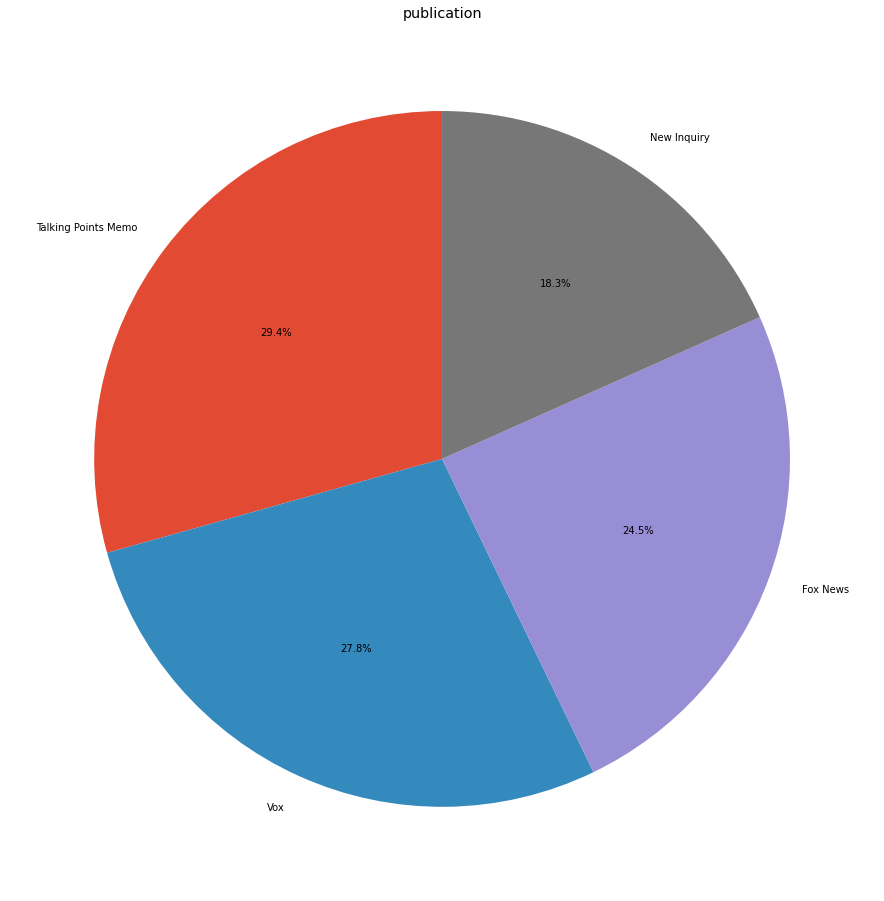

In [5]:
# visualize the sample counts of each label
labels = list(df_label_counts.to_frame().index)
counts = df_label_counts.values
plot_pie_chart(labels, counts, "publication").show()

In [6]:
# map categoric lables to numeric
df["label"] = df["publication"].map({'Fox News': 0, 'Talking Points Memo': 1, 'Vox': 2, 'New Inquiry':3})
df.head()

,content,publication,label
0,sign comment dozen peopl hurt massiv broke lux...,Fox News,0
1,sign comment republican presidenti candid ben ...,Fox News,0
2,sign comment democrat presidenti candid martin...,Fox News,0
3,sign comment nasti battl broken republican pre...,Fox News,0
4,sign comment donald trump launch new attack hi...,Fox News,0


In [7]:
df.head()

,content,publication,label
0,sign comment dozen peopl hurt massiv broke lux...,Fox News,0
1,sign comment republican presidenti candid ben ...,Fox News,0
2,sign comment democrat presidenti candid martin...,Fox News,0
3,sign comment nasti battl broken republican pre...,Fox News,0
4,sign comment donald trump launch new attack hi...,Fox News,0


# Select Number of Clusters

In [8]:
transformed = apply_tf_idf(df['content'], max_features=100)
df_svd = apply_svd(transformed, 2)
df_svd.shape

(17784, 2)

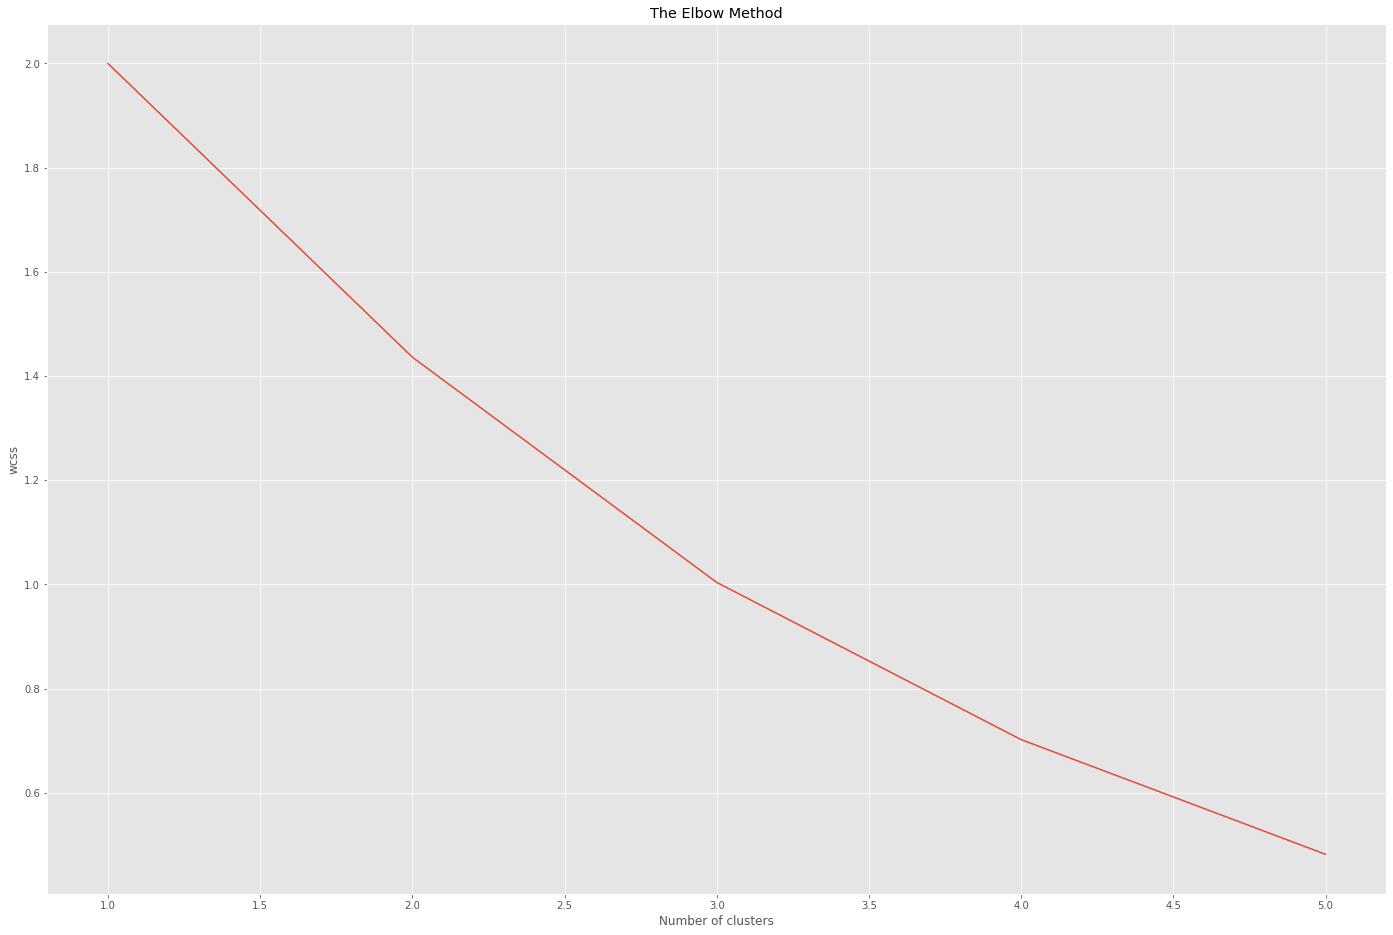

In [9]:
# use elbow method to define number of cluster
plot_elbow(df_svd, (1, 6)).show()

# Clustering Results

In [10]:
# apply pipeline with default parameters 
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 2, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(17784, 2)
   silhouette_score 
0           0.994176
Number of samples in each cluster:Counter({0: 17760, 1: 24})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


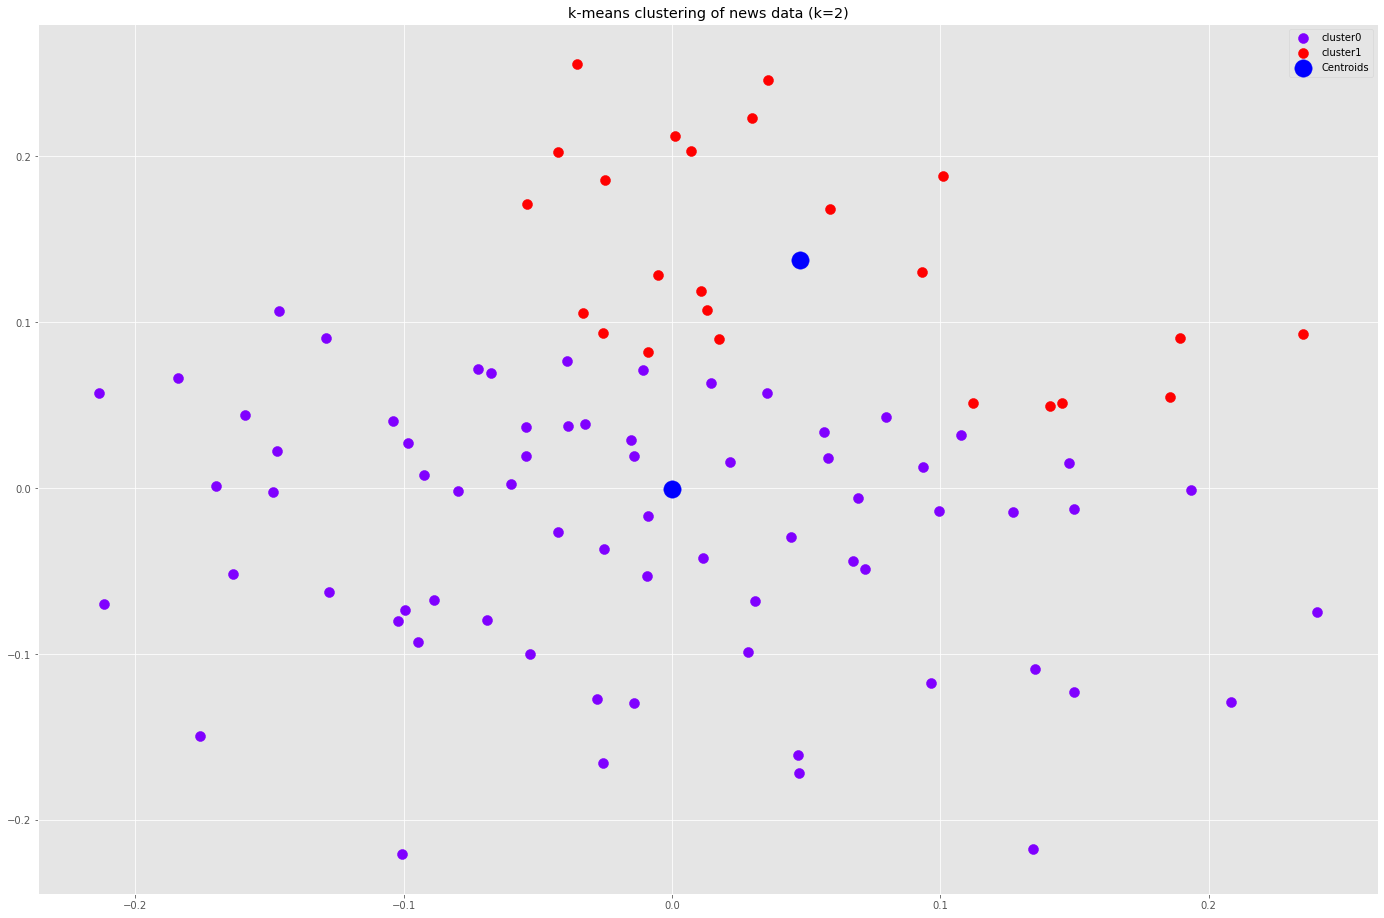

In [11]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data (k=2)").show()

In [12]:
# apply k-means clustering fot number of cluter 4
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 4, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(17784, 2)
   silhouette_score 
0           0.995728
Number of samples in each cluster:Counter({0: 17721, 2: 23, 3: 20, 1: 20})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

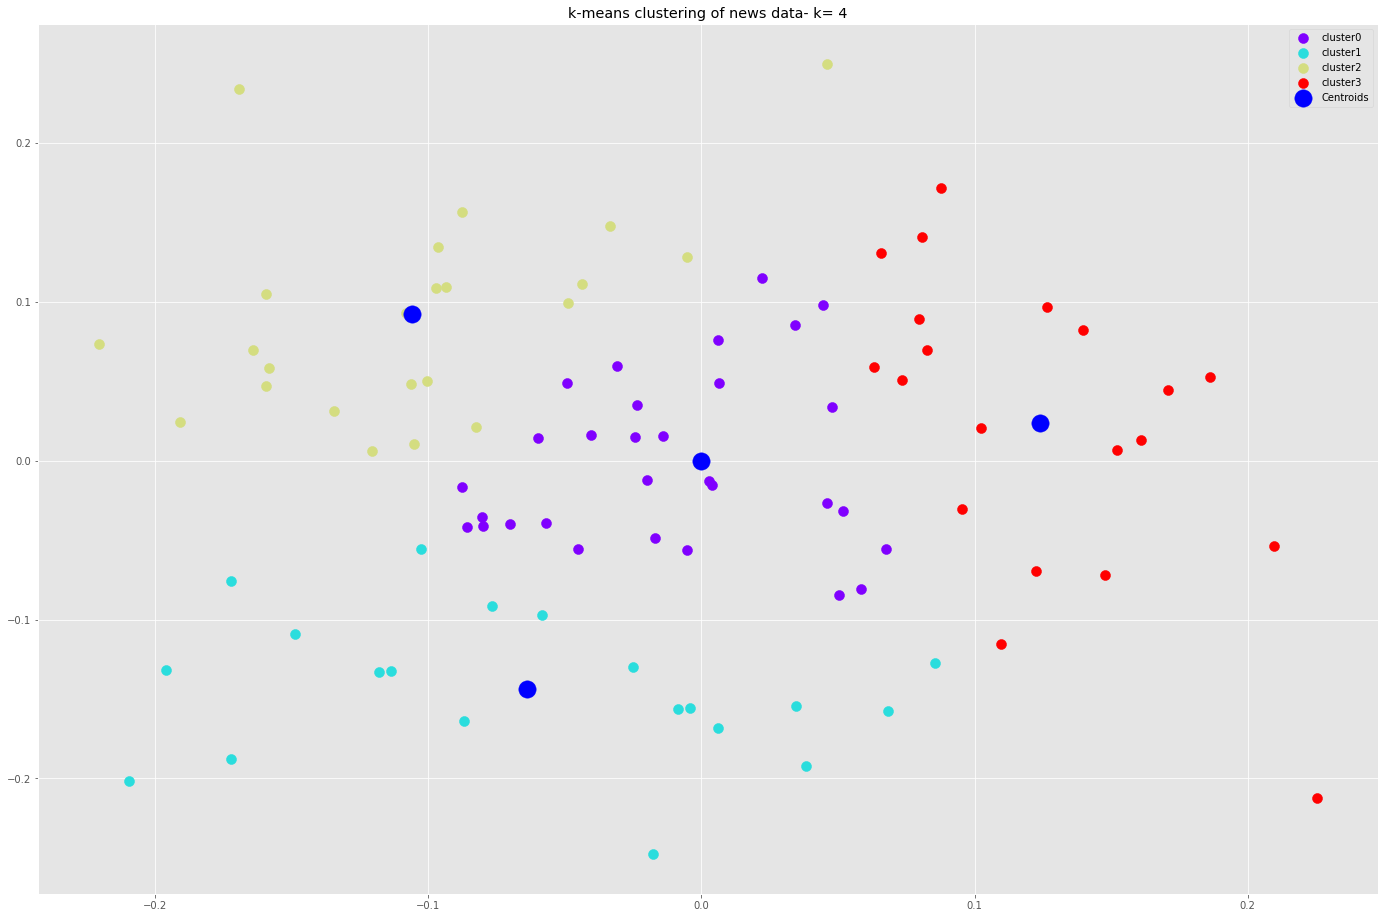

In [13]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4").show()

In [14]:
# apply k-means clustering fot number of cluter 4
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 3, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(17784, 2)
   silhouette_score 
0           0.995121
Number of samples in each cluster:Counter({0: 17737, 2: 28, 1: 19})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


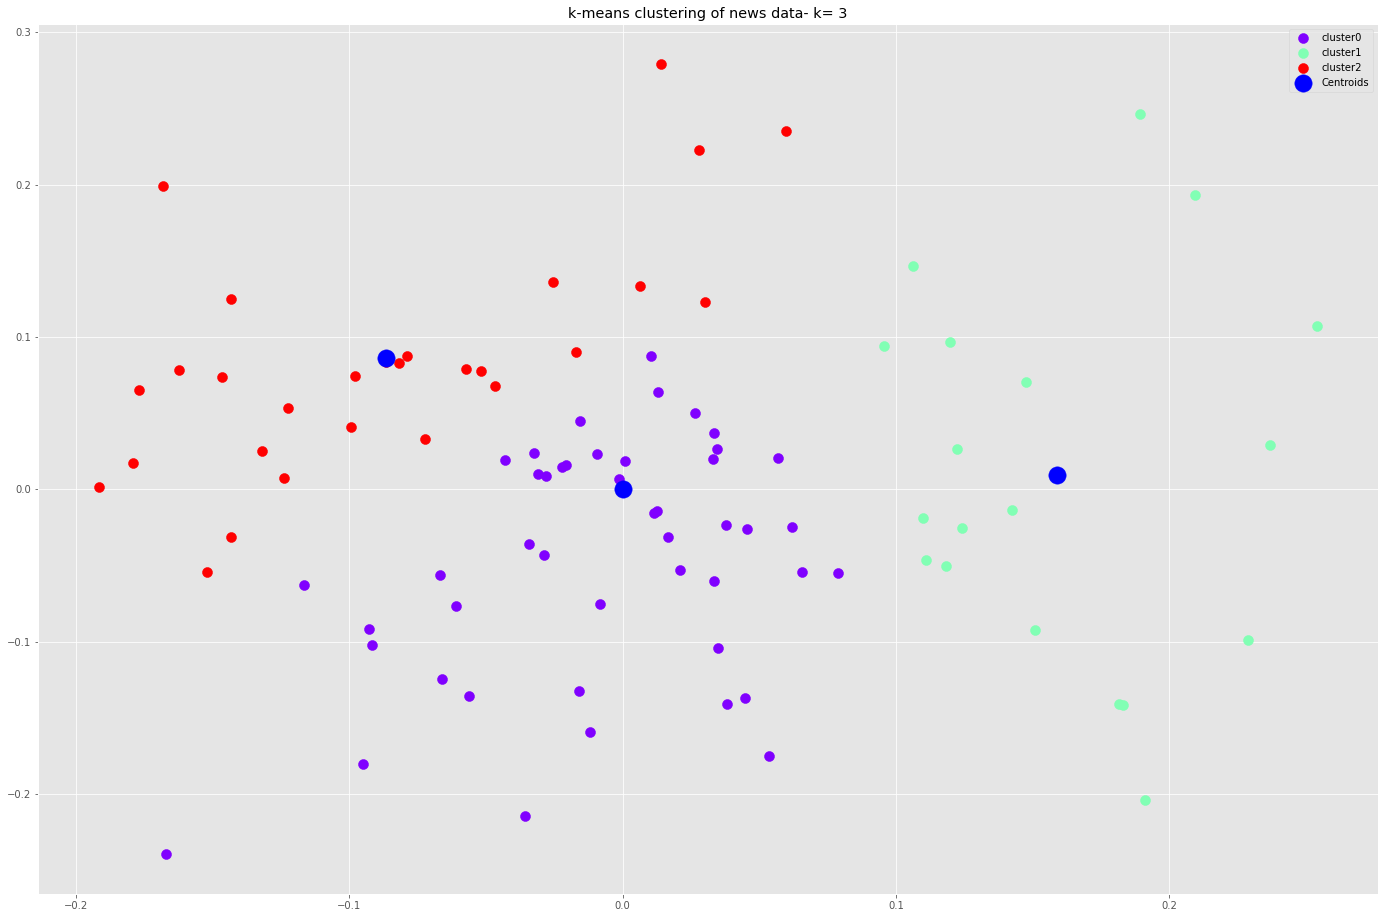

In [15]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 3").show()

In [16]:
# apply k-means clustering fot number of cluter 6
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 6, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(17784, 2)
   silhouette_score 
0           0.996017
Number of samples in each cluster:Counter({0: 17720, 4: 17, 1: 15, 2: 12, 3: 11, 5: 9})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

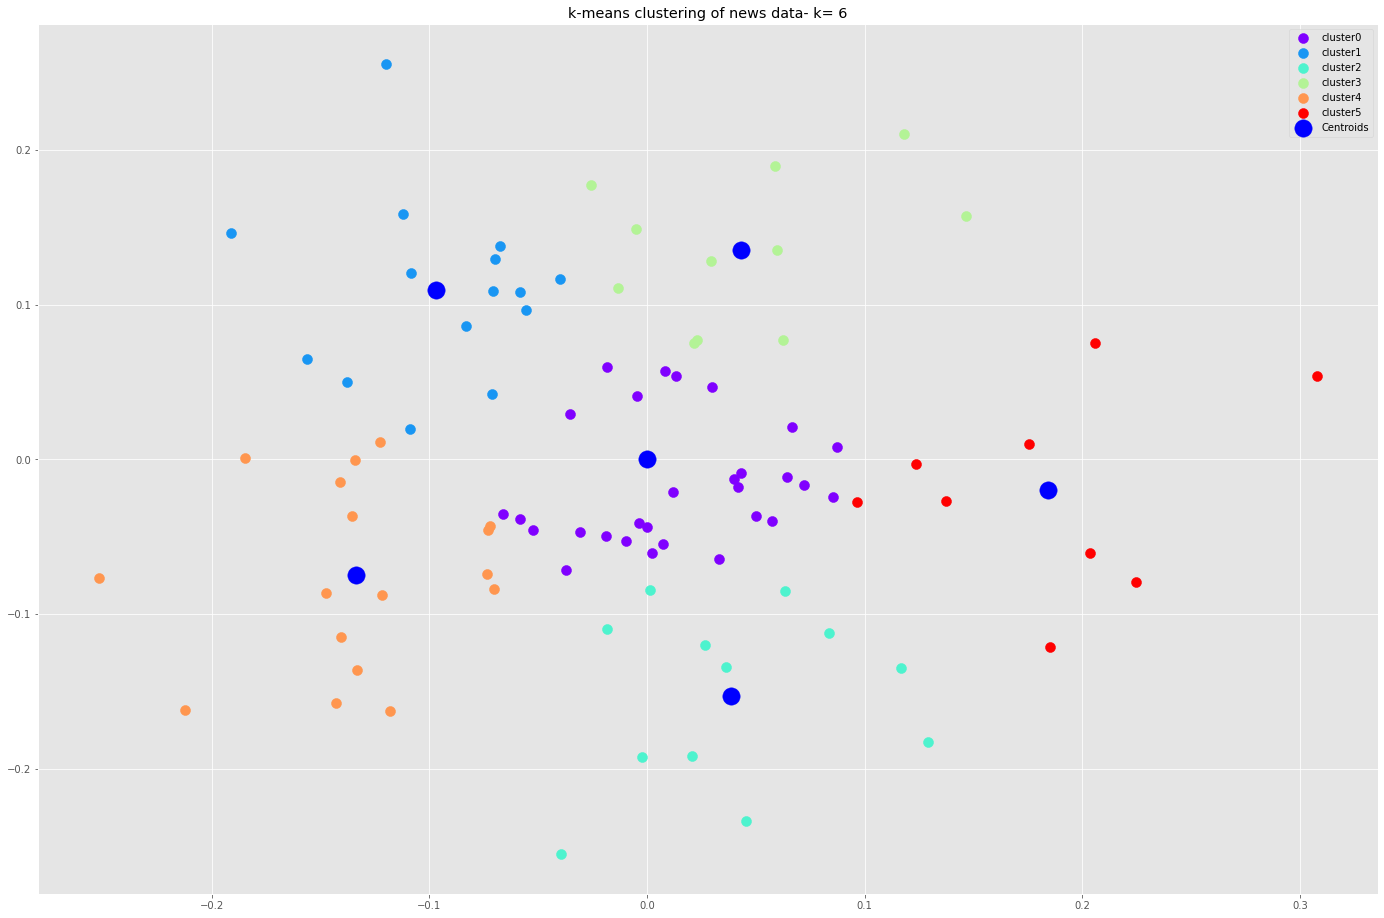

In [17]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 6").show()

In [18]:
corpus = df['content'].values
labels = df['label'].values
kmeans, y_kmeans, data_svd = pipeline(corpus, 2,  labels, n_components=10, max_features=10000)

   Completeness  Homogeneity  silhouette_score 
0       0.04756     0.010281           0.599918


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


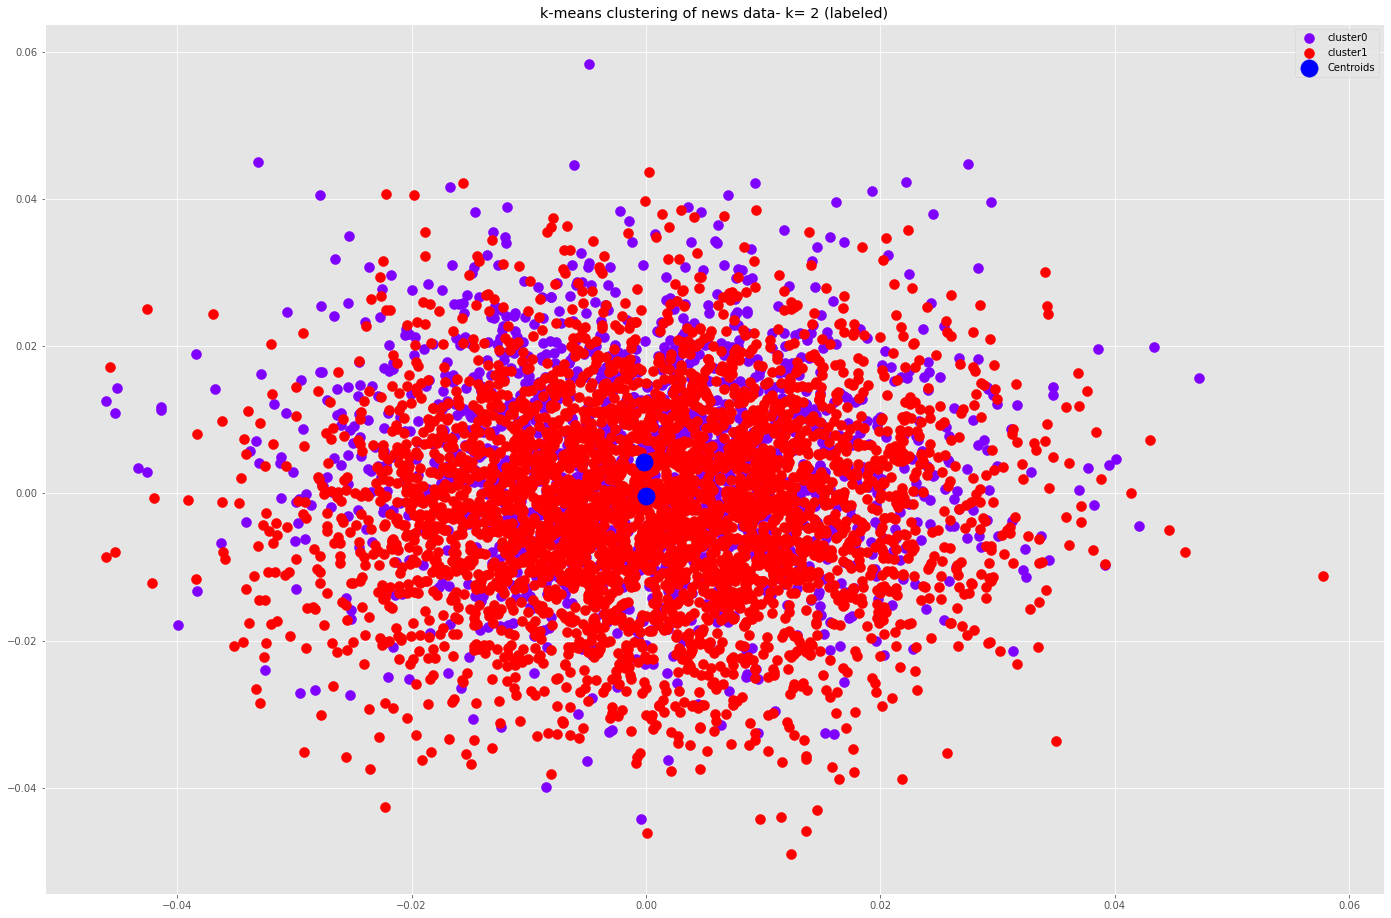

In [19]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 2 (labeled)").show()

In [20]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 2,  labels, n_components=2, max_features=1000)

   Completeness  Homogeneity  silhouette_score 
0      0.044298     0.002192           0.947995


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


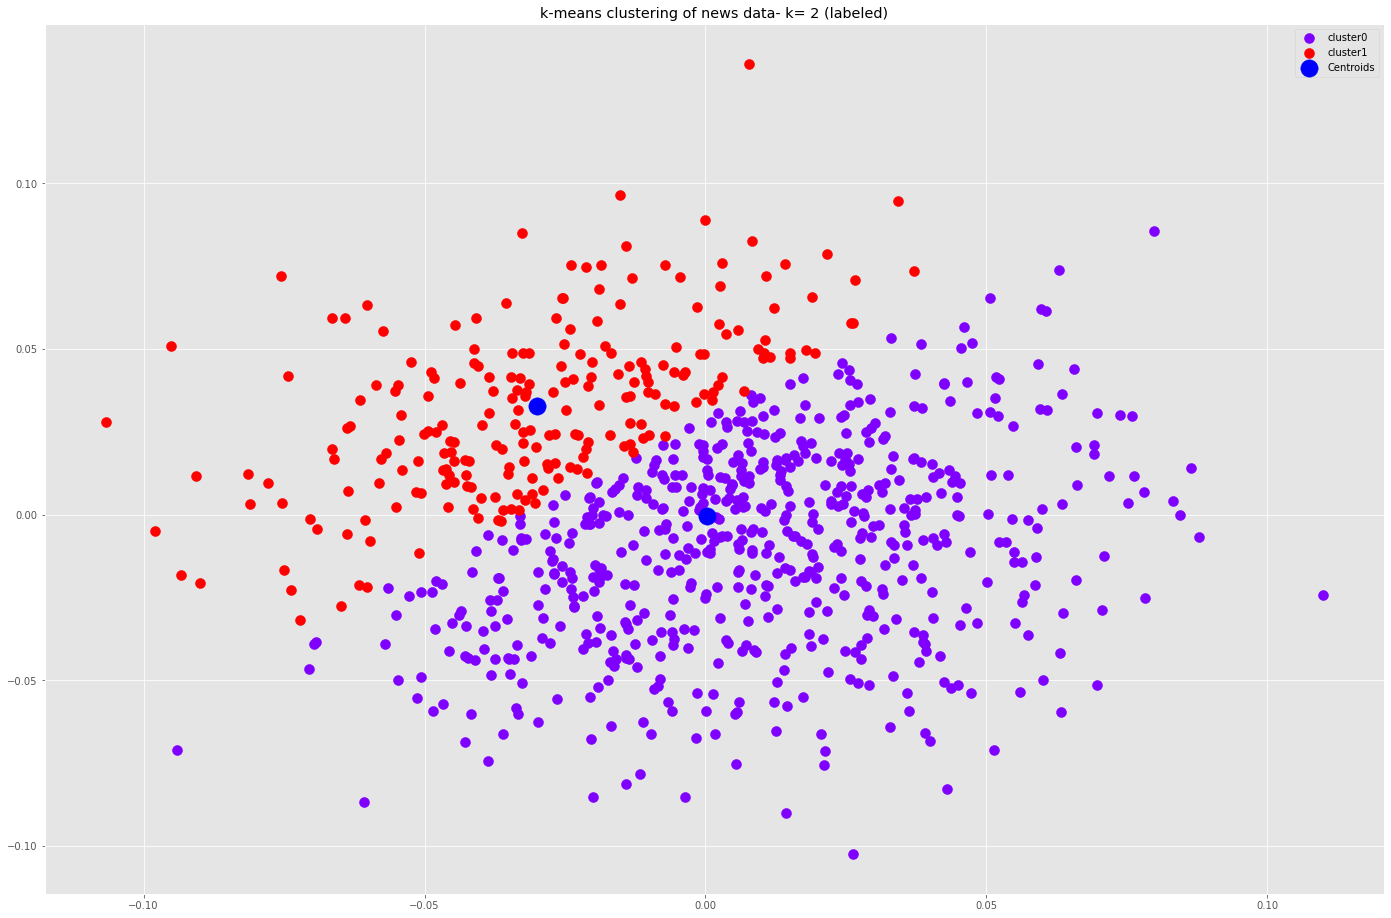

In [21]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 2 (labeled)").show()

In [22]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=2, max_features=1000)

   Completeness  Homogeneity  silhouette_score 
0      0.042936     0.005794           0.961126


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

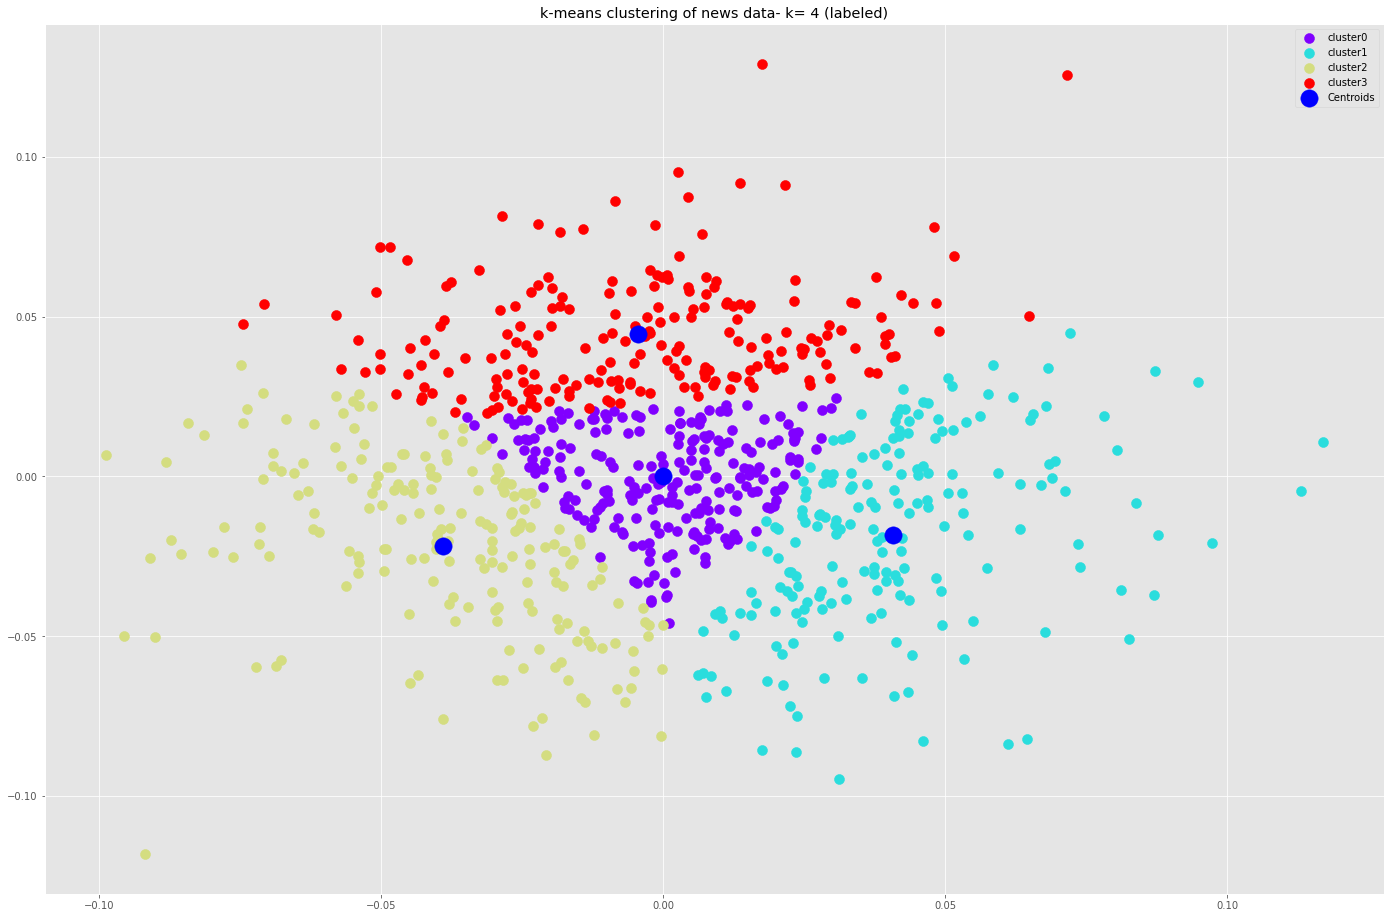

In [23]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()

In [24]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=2, max_features=1000, n_gram=(1, 2), analyzer="char")

   Completeness  Homogeneity  silhouette_score 
0      0.038316      0.00227           0.985745


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

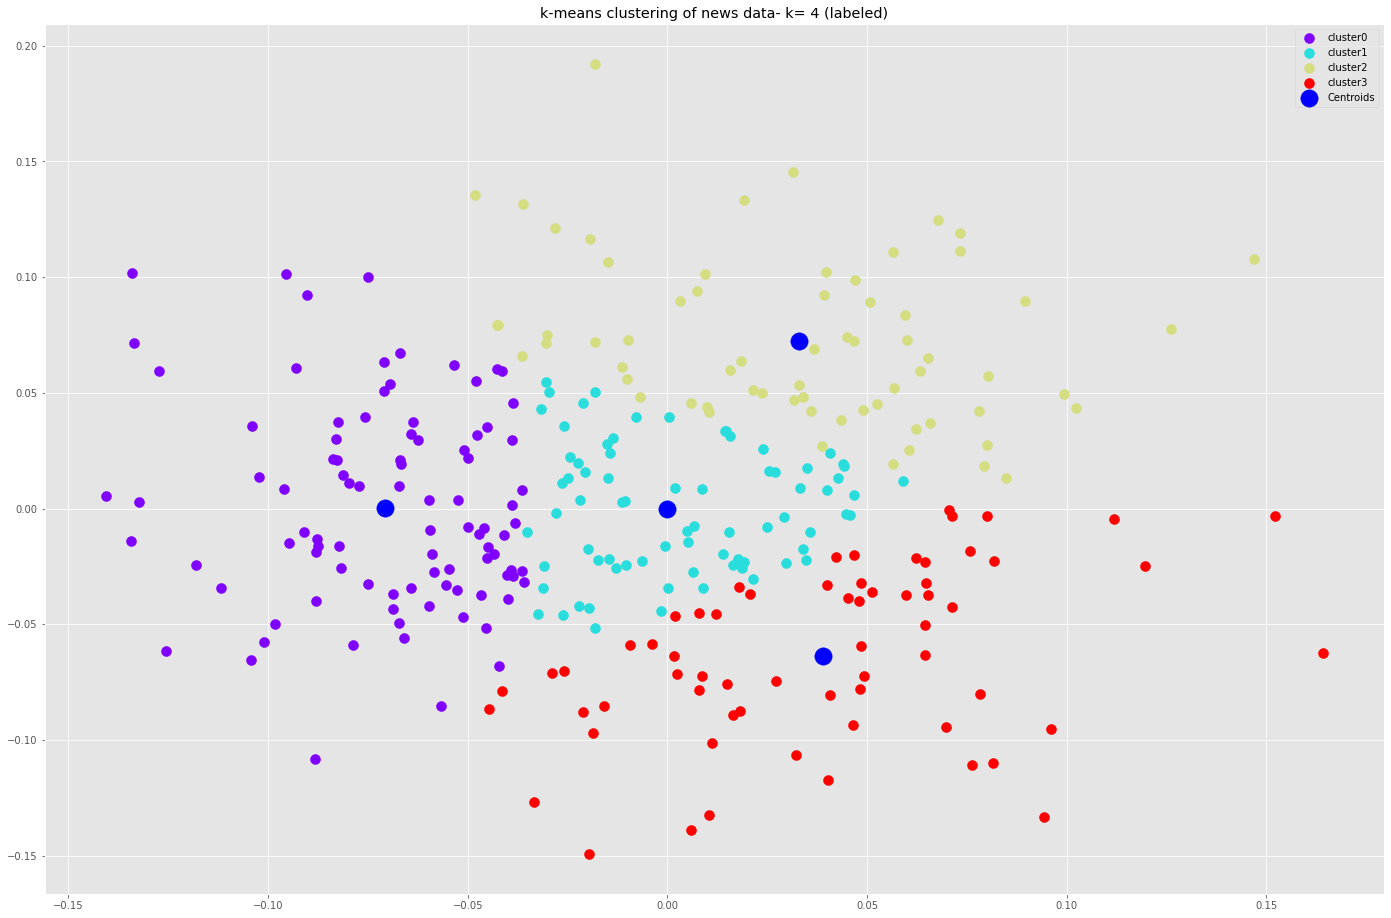

In [25]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()

In [26]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=2, max_features=1000, n_gram=(1, 2), analyzer="word")

   Completeness  Homogeneity  silhouette_score 
0      0.054691     0.006785           0.964477


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

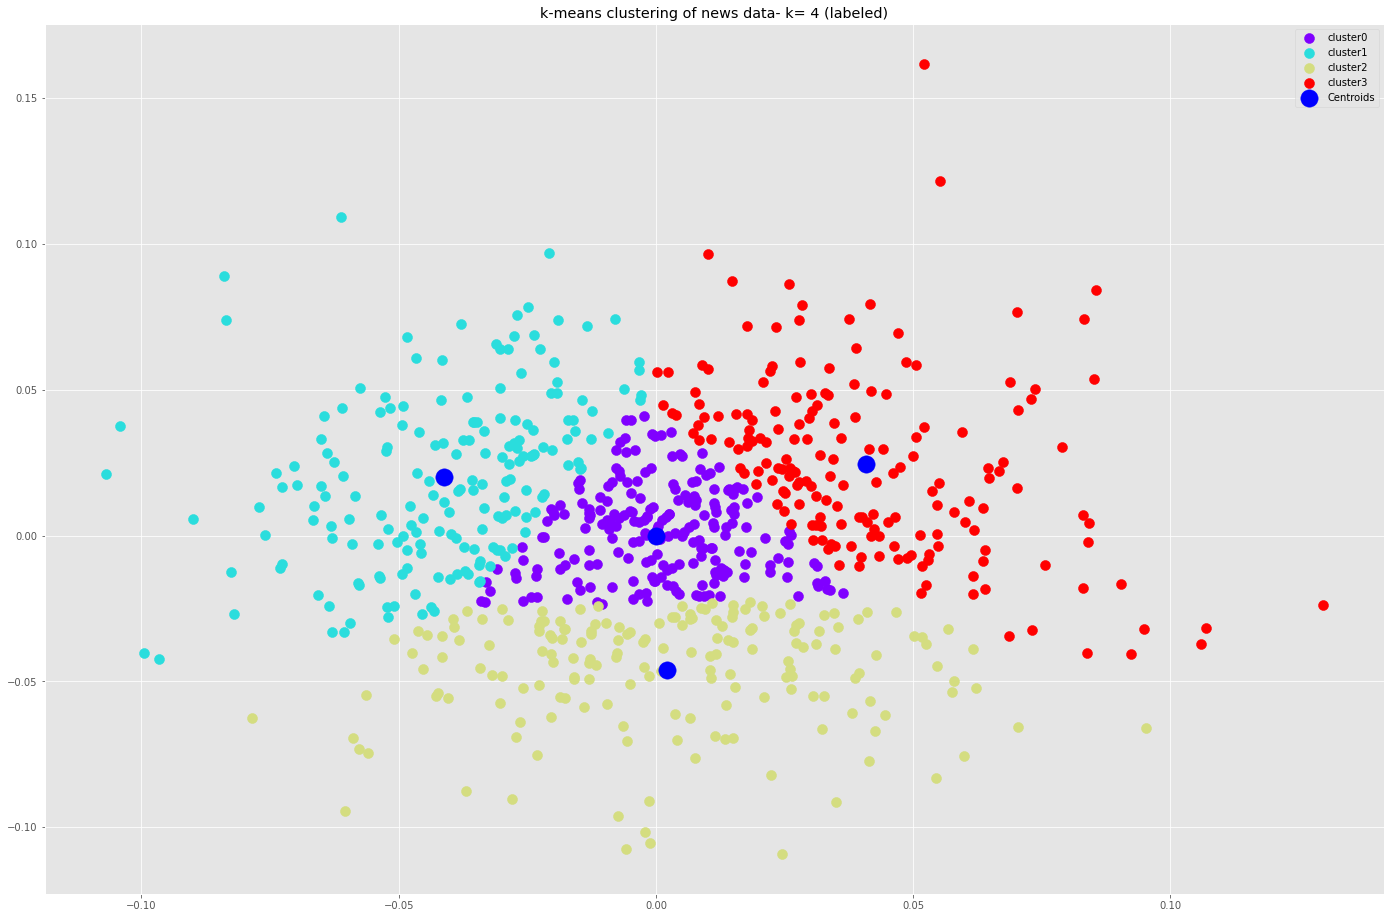

In [27]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()

In [34]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=2, max_features=1000, n_gram=(2, 4), analyzer="word")

   Completeness  Homogeneity  silhouette_score 
0      0.070607     0.007355           0.971964


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

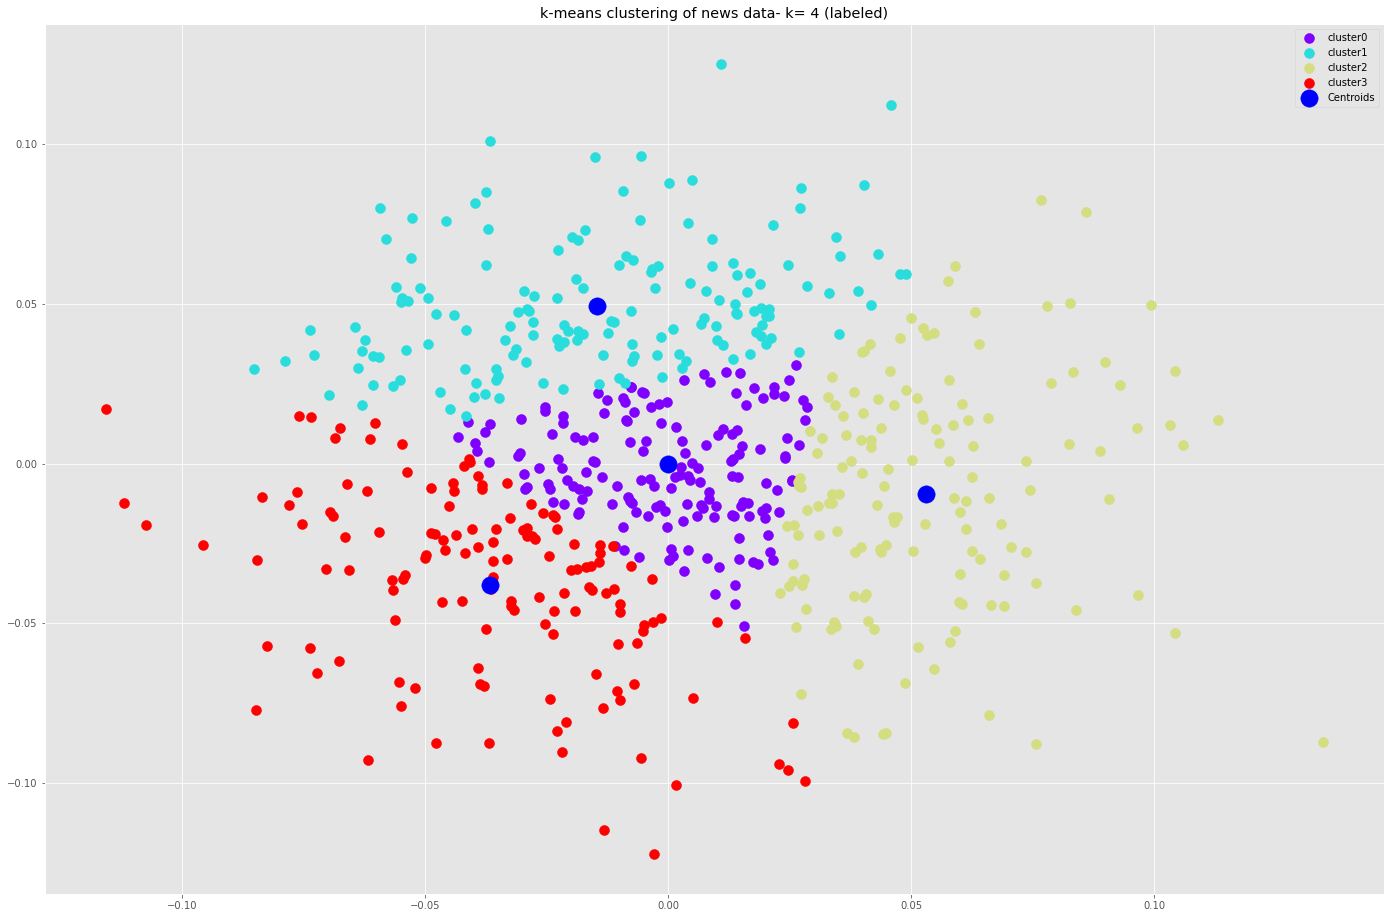

In [35]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()

In [38]:
corpus.shape

(17784,)

In [ ]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=100, n_gram=(2, 3), analyzer="word")

In [ ]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()

In [ ]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=100, n_gram=(1, 2), analyzer="word")

In [ ]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()